In [1]:
!git clone https://github.com/p595939247/data.git


Cloning into 'data'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 14 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (14/14), 26.39 MiB | 6.61 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (6/6), done.


In [2]:
import pandas as pd
import os

# 設定存放 CSV 檔案的目錄
directory = "data"  # 假設你已經將 GitHub 中的 repo 下載到 "data" 目錄中

# 讀取所有需要合併的 CSV 檔案
csv_files = ['new_retail_0.csv', 'new_retail_1.csv', 'new_retail_2.csv', 'new_retail_3.csv', 'new_retail_4.csv']

# 使用 pandas 來讀取並合併這些檔案
dataframes = [pd.read_csv(os.path.join(directory, file)) for file in csv_files]

# 合併所有的 DataFrame
merged_data = pd.concat(dataframes, ignore_index=True)

# 將合併後的 DataFrame 存成一個新的 CSV 檔案
output_file = os.path.join(directory, 'new_retail_data.csv')
merged_data.to_csv(output_file, index=False)

print(f"已成功合併 CSV 檔案，並存儲為 '{output_file}'")


已成功合併 CSV 檔案，並存儲為 'data/new_retail_data.csv'


In [3]:
import pandas as pd

# 讀取合併後的 CSV 檔案
file_path = 'data/new_retail_data.csv'

# 使用 pandas 讀取 CSV 文件
data = pd.read_csv(file_path)

# 顯示資料的前幾行
data.head()


,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [ ]:
import pandas as pd

# 讀取合併後的 CSV 檔案
file_path = 'data/new_retail_data.csv'

# 使用 pandas 讀取 CSV 文件
data = pd.read_csv(file_path)

# 顯示欄位名稱
print(data.columns.tolist())


['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address', 'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income', 'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases', 'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand', 'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method', 'Order_Status', 'Ratings', 'products']


In [ ]:
# 刪除不必要的欄位
columns_to_drop = ['Address', 'City', 'State', 'Zipcode', 'Customer_Segment', 'Shipping_Method',
                    'Payment_Method', 'Order_Status', 'products', 'Year', 'Month', 'Time',
                    'Total_Purchases', 'Amount']
data_cleaned = data.drop(columns=columns_to_drop)

# 顯示更新後的 DataFrame
print(data_cleaned.head())
print("\n欄位名稱:")
print(data_cleaned.columns.tolist())


   Transaction_ID  Customer_ID                 Name                Email  \
0       8691788.0      37249.0  Michelle Harrington    Ebony39@gmail.com   
1       2174773.0      69749.0          Kelsey Hill     Mark36@gmail.com   
2       6679610.0      30192.0         Scott Jensen    Shane85@gmail.com   
3       7232460.0      62101.0        Joseph Miller     Mary34@gmail.com   
4       4983775.0      27901.0        Debra Coleman  Charles30@gmail.com   

          Phone    Country   Age  Gender Income        Date  Total_Amount  \
0  1.414787e+09    Germany  21.0    Male    Low   9/18/2023    324.086270   
1  6.852900e+09         UK  19.0  Female    Low  12/31/2023    806.707815   
2  8.362160e+09  Australia  48.0    Male    Low   4/26/2023   1063.432799   
3  2.776752e+09     Canada  56.0    Male   High    5/8/2023   2466.854021   
4  9.098268e+09         UK  22.0    Male    Low   1/10/2024    248.553049   

  Product_Category  Product_Brand Product_Type   Feedback  Ratings  
0         C

In [ ]:
# 顯示處理前的資料筆數
print(f"處理前的資料筆數: {data_cleaned.shape[0]}")

# 檢查缺失值
print("\n缺失值統計:")
print(data_cleaned.isnull().sum())

# 刪除包含缺失值的 row
data_cleaned_no_missing = data_cleaned.dropna()

# 顯示處理後的資料筆數
print(f"\n處理後的資料筆數: {data_cleaned_no_missing.shape[0]}")

處理前的資料筆數: 302010

缺失值統計:
Transaction_ID      333
Customer_ID         308
Name                382
Email               347
Phone               362
Country             271
Age                 173
Gender              317
Income              290
Date                359
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Ratings             184
dtype: int64

處理後的資料筆數: 297798


In [ ]:
# 顯示刪除缺失值後的資料表詳細資訊
print("\n刪除缺失值後的資料表詳細資訊:")
print(data_cleaned_no_missing.info())


刪除缺失值後的資料表詳細資訊:
<class 'pandas.core.frame.DataFrame'>
Index: 297798 entries, 0 to 302009
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    297798 non-null  float64
 1   Customer_ID       297798 non-null  float64
 2   Name              297798 non-null  object 
 3   Email             297798 non-null  object 
 4   Phone             297798 non-null  float64
 5   Country           297798 non-null  object 
 6   Age               297798 non-null  float64
 7   Gender            297798 non-null  object 
 8   Income            297798 non-null  object 
 9   Date              297798 non-null  object 
 10  Total_Amount      297798 non-null  float64
 11  Product_Category  297798 non-null  object 
 12  Product_Brand     297798 non-null  object 
 13  Product_Type      297798 non-null  object 
 14  Feedback          297798 non-null  object 
 15  Ratings           297798 non-null  float64
dtypes: float

In [ ]:
# 轉換 'Date' 欄位為日期格式
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])

# 定義分類變數列表
categorical_columns = ['Gender', 'Income', 'Product_Category', 'Product_Brand', 'Product_Type', 'Feedback']

# 儲存編碼對應表
mappings = {}

# 對每個分類變數進行數字編碼
for column in categorical_columns:
    # 生成數字編碼對應表
    mapping = {value: idx for idx, value in enumerate(data_cleaned[column].astype('category').cat.categories)}
    mappings[column] = mapping

    # 將分類變數轉換為數字型態
    data_cleaned[column] = data_cleaned[column].map(mapping)

# 顯示每個變數的編碼對應表
for column, mapping in mappings.items():
    print(f"Mapping for '{column}': {mapping}")

# 顯示更新後的資料表詳細資訊
print("\n更新後的資料表詳細資訊:")
print(data_cleaned.info())

Mapping for 'Gender': {'Female': 0, 'Male': 1}
Mapping for 'Income': {'High': 0, 'Low': 1, 'Medium': 2}
Mapping for 'Product_Category': {'Books': 0, 'Clothing': 1, 'Electronics': 2, 'Grocery': 3, 'Home Decor': 4}
Mapping for 'Product_Brand': {'Adidas': 0, 'Apple': 1, 'Bed Bath & Beyond': 2, 'BlueStar': 3, 'Coca-Cola': 4, 'HarperCollins': 5, 'Home Depot': 6, 'IKEA': 7, 'Mitsubhisi': 8, 'Nestle': 9, 'Nike': 10, 'Penguin Books': 11, 'Pepsi': 12, 'Random House': 13, 'Samsung': 14, 'Sony': 15, 'Whirepool': 16, 'Zara': 17}
Mapping for 'Product_Type': {'Bathroom': 0, 'Bedding': 1, 'BlueStar AC': 2, "Children's": 3, 'Chocolate': 4, 'Coffee': 5, 'Decorations': 6, 'Dress': 7, 'Fiction': 8, 'Fridge': 9, 'Furniture': 10, 'Headphones': 11, 'Jacket': 12, 'Jeans': 13, 'Juice': 14, 'Kitchen': 15, 'Laptop': 16, 'Lighting': 17, 'Literature': 18, 'Mitsubishi 1.5 Ton 3 Star Split AC': 19, 'Non-Fiction': 20, 'Shirt': 21, 'Shoes': 22, 'Shorts': 23, 'Smartphone': 24, 'Snacks': 25, 'Soft Drink': 26, 'T-shirt'

In [ ]:
from sklearn.preprocessing import StandardScaler

# 選擇需要標準化的特徵
features_to_standardize = ['Age', 'Gender', 'Income', 'Total_Amount', 'Product_Category', 'Product_Brand', 'Product_Type', 'Ratings']

# 提取這些特徵
data_features = data_cleaned[features_to_standardize]

# 標準化數據特徵
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_features)

# 將標準化後的數據轉換為 DataFrame
data_standardized_df = pd.DataFrame(data_standardized, columns=features_to_standardize)

# 顯示標準化後的數據
data_standardized_df.head()

,Age,Gender,Income,Total_Amount,Product_Category,Product_Brand,Product_Type,Ratings
0,-0.964014,0.779859,-0.226501,-0.924329,-0.764145,0.256407,0.530562,1.391047
1,-1.097153,-1.282283,-0.226501,-0.496851,-0.028208,1.038727,1.058636,0.633945
2,0.833361,0.779859,-0.226501,-0.269459,-1.500082,0.451987,-1.581736,-0.880260
3,1.365917,0.779859,-1.469021,0.973610,1.443666,-0.525912,1.375481,0.633945
4,-0.897444,0.779859,-0.226501,-0.991232,0.707729,0.060827,-1.476121,-1.637363


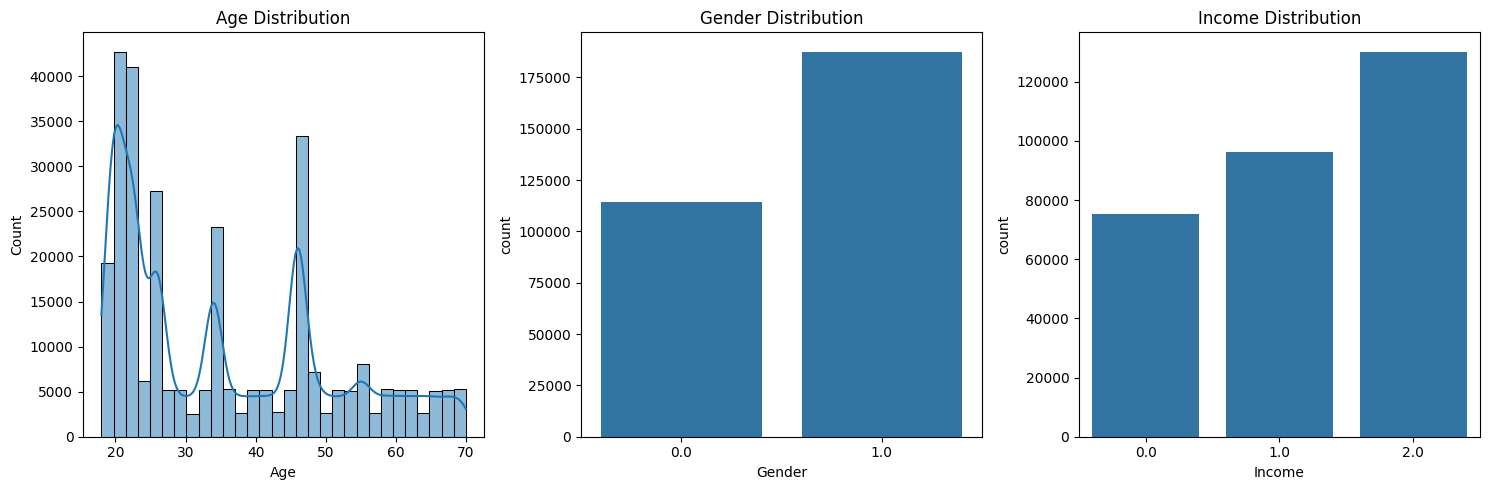

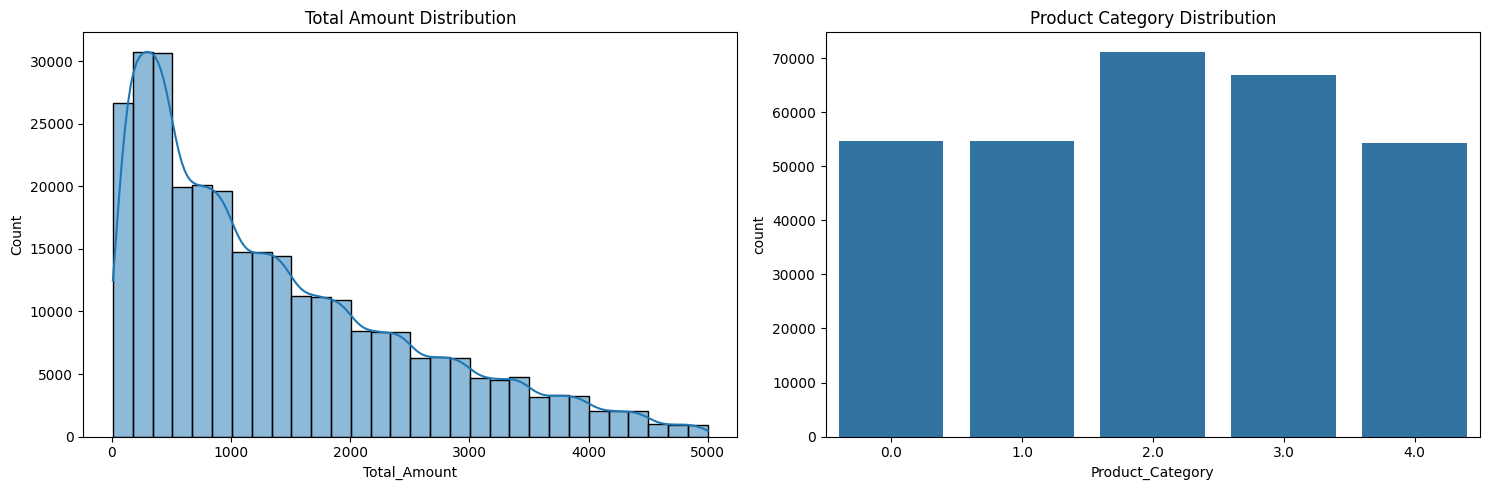

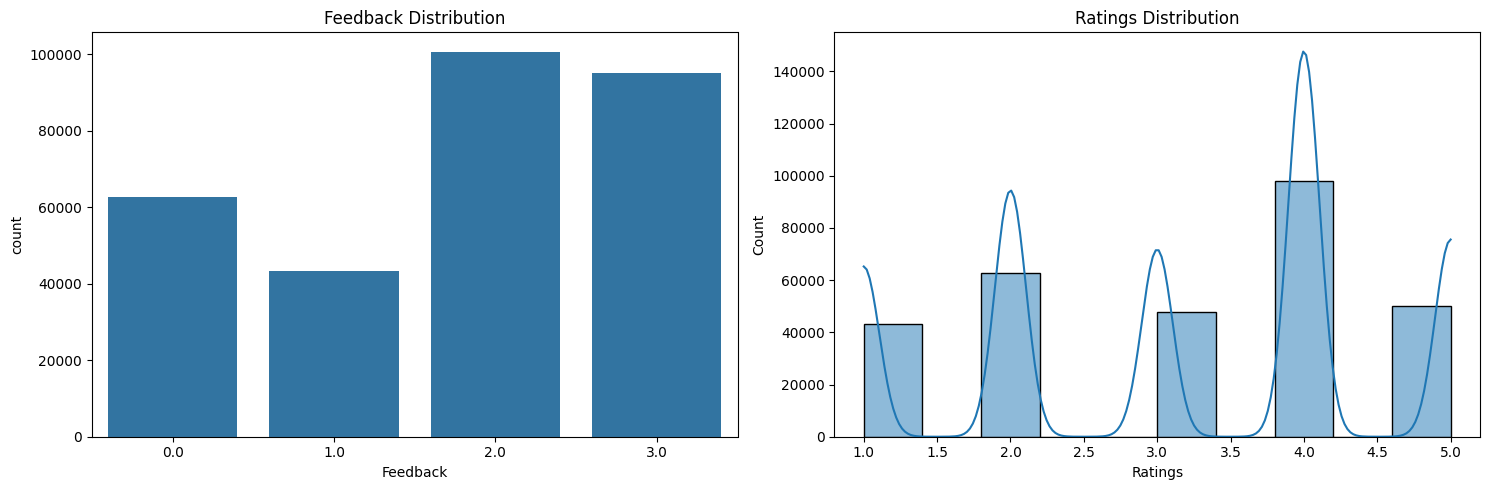

Mapping for 'Gender': {'Female': 0, 'Male': 1}
Mapping for 'Income': {'High': 0, 'Low': 1, 'Medium': 2}
Mapping for 'Product_Category': {'Books': 0, 'Clothing': 1, 'Electronics': 2, 'Grocery': 3, 'Home Decor': 4}
Mapping for 'Product_Brand': {'Adidas': 0, 'Apple': 1, 'Bed Bath & Beyond': 2, 'BlueStar': 3, 'Coca-Cola': 4, 'HarperCollins': 5, 'Home Depot': 6, 'IKEA': 7, 'Mitsubhisi': 8, 'Nestle': 9, 'Nike': 10, 'Penguin Books': 11, 'Pepsi': 12, 'Random House': 13, 'Samsung': 14, 'Sony': 15, 'Whirepool': 16, 'Zara': 17}
Mapping for 'Product_Type': {'Bathroom': 0, 'Bedding': 1, 'BlueStar AC': 2, "Children's": 3, 'Chocolate': 4, 'Coffee': 5, 'Decorations': 6, 'Dress': 7, 'Fiction': 8, 'Fridge': 9, 'Furniture': 10, 'Headphones': 11, 'Jacket': 12, 'Jeans': 13, 'Juice': 14, 'Kitchen': 15, 'Laptop': 16, 'Lighting': 17, 'Literature': 18, 'Mitsubishi 1.5 Ton 3 Star Split AC': 19, 'Non-Fiction': 20, 'Shirt': 21, 'Shoes': 22, 'Shorts': 23, 'Smartphone': 24, 'Snacks': 25, 'Soft Drink': 26, 'T-shirt'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 可視化人口特徵
plt.figure(figsize=(15, 5))

# 年齡分佈
plt.subplot(1, 3, 1)
sns.histplot(data_cleaned['Age'], kde=True, bins=30)
plt.title('Age Distribution')

# 性別分佈
plt.subplot(1, 3, 2)
sns.countplot(x='Gender', data=data_cleaned)
plt.title('Gender Distribution')

# 收入分佈
plt.subplot(1, 3, 3)
sns.countplot(x='Income', data=data_cleaned)
plt.title('Income Distribution')

plt.tight_layout()
plt.show()

# 可視化購買行為
plt.figure(figsize=(15, 5))

# 總金額分佈
plt.subplot(1, 2, 1)
sns.histplot(data_cleaned['Total_Amount'], kde=True, bins=30)
plt.title('Total Amount Distribution')

# 商品類別分佈
plt.subplot(1, 2, 2)
sns.countplot(x='Product_Category', data=data_cleaned)
plt.title('Product Category Distribution')

plt.tight_layout()
plt.show()

# 可視化回饋和評分
plt.figure(figsize=(15, 5))

# 回饋分佈
plt.subplot(1, 2, 1)
sns.countplot(x='Feedback', data=data_cleaned)
plt.title('Feedback Distribution')

# 評分分佈
plt.subplot(1, 2, 2)
sns.histplot(data_cleaned['Ratings'], kde=True, bins=10)
plt.title('Ratings Distribution')

plt.tight_layout()
plt.show()

# 印出已編碼分類變數的映射對應表
for column, mapping in mappings.items():
    print(f"Mapping for '{column}': {mapping}")

In [ ]:
# 計算 RFM 指標
current_date = data_cleaned['Date'].max() + pd.DateOffset(1)  # 假設今天是最新的日期

# Recency: 距離最近一次購買的天數
data_rfm = data_cleaned.groupby('Customer_ID').agg({
    'Date': lambda x: (current_date - x.max()).days,
    'Transaction_ID': 'count',
    'Total_Amount': 'sum'
}).rename(columns={
    'Date': 'Recency',
    'Transaction_ID': 'Frequency',
    'Total_Amount': 'Monetary'
})

# 添加 RFM 特徵
data_rfm.reset_index(inplace=True)

# 顯示 RFM 特徵
print("RFM 特徵:")
print(data_rfm.head())



RFM 特徵:
   Customer_ID  Recency  Frequency     Monetary
0      10000.0    103.0          4  5007.566357
1      10001.0    105.0          5  8136.462824
2      10002.0     95.0          5  4104.013951
3      10003.0    228.0          2  2340.496447
4      10004.0     31.0          2  2356.516683


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

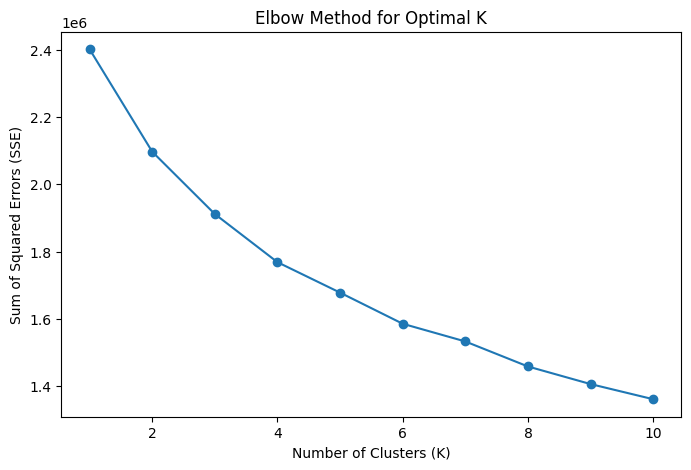

In [ ]:
from sklearn.cluster import KMeans

# 定義需要的特徵
features_to_standardize = ['Age', 'Gender', 'Income', 'Total_Amount', 'Product_Category', 'Product_Brand', 'Product_Type', 'Ratings']
data_features = data_cleaned[features_to_standardize]

# 刪除包含缺失值的行
data_features_cleaned = data_features.dropna()

# 標準化數據
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_features_cleaned)

# 計算不同 K 值的 KMeans 模型
sse = []
k_values = range(1, 11)  # 嘗試 1 到 10 個聚類

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_standardized)
    sse.append(kmeans.inertia_)  # 每個模型的 SSE

# 繪製肘部圖
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [ ]:

data_rfm = data_cleaned.groupby('Customer_ID').agg({
    'Date': lambda x: (current_date - x.max()).days,
    'Transaction_ID': 'count',
    'Total_Amount': 'sum'
}).rename(columns={
    'Date': 'Recency',
    'Transaction_ID': 'Frequency',
    'Total_Amount': 'Monetary'
})

# 刪除包含缺失值的行
data_rfm_cleaned = data_rfm.dropna()

# 標準化 RFM 特徵
features_to_standardize = ['Recency', 'Frequency', 'Monetary']
scaler = StandardScaler()
data_rfm_standardized = scaler.fit_transform(data_rfm_cleaned[features_to_standardize])

# 使用 KMeans 進行聚類（設置為2個群）
kmeans = KMeans(n_clusters=2, random_state=42)
data_rfm_cleaned['Cluster'] = kmeans.fit_predict(data_rfm_standardized)

# 顯示結果
print("RFM 表格加上 KMeans 聚類結果:")
print(data_rfm_cleaned.head())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


RFM 表格加上 KMeans 聚類結果:
             Recency  Frequency     Monetary  Cluster
Customer_ID                                          
10000.0        103.0          4  5007.566357        0
10001.0        105.0          5  8136.462824        0
10002.0         95.0          5  4104.013951        0
10003.0        228.0          2  2340.496447        1
10004.0         31.0          2  2356.516683        1


<ipython-input-14-04d970521413>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rfm_cleaned['Cluster'] = kmeans.fit_predict(data_rfm_standardized)


In [ ]:
# 分析每個聚類的特徵
cluster_summary = data_rfm_cleaned.groupby('Cluster').mean()  # 如果使用了插補，則用 data_rfm_imputed
print("\n每個聚類的特徵分析:")
print(cluster_summary)



每個聚類的特徵分析:
            Recency  Frequency     Monetary
Cluster                                    
0         53.685591   4.962856  7322.443348
1        131.340883   2.293104  2711.167263


In [ ]:
# 根據分析結果定義客戶群體
data_rfm_cleaned['Customer_Segment'] = data_rfm_cleaned['Cluster'].apply(lambda x: 'High Value' if x == 0 else 'Low Value')  # 如果使用了插補，則用 data_rfm_imputed

# 顯示帶有客戶分群結果的 RFM 表格
print("\n客戶分配到客群的 RFM 表格:")
print(data_rfm_cleaned.head())  # 如果使用了插補，則用 data_rfm_imputed



客戶分配到客群的 RFM 表格:
             Recency  Frequency     Monetary  Cluster Customer_Segment
Customer_ID                                                           
10000.0        103.0          4  5007.566357        0       High Value
10001.0        105.0          5  8136.462824        0       High Value
10002.0         95.0          5  4104.013951        0       High Value
10003.0        228.0          2  2340.496447        1        Low Value
10004.0         31.0          2  2356.516683        1        Low Value


<ipython-input-16-c47320d95f9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rfm_cleaned['Customer_Segment'] = data_rfm_cleaned['Cluster'].apply(lambda x: 'High Value' if x == 0 else 'Low Value')  # 如果使用了插補，則用 data_rfm_imputed


In [ ]:
import plotly.express as px

# 建立 3D 散佈圖
fig = px.scatter_3d(
    data_rfm_cleaned,
    x='Recency',
    y='Frequency',
    z='Monetary',
    color='Cluster',
    labels={'Recency': 'Recency', 'Frequency': 'Frequency', 'Monetary': 'Monetary', 'Cluster': 'Cluster'},
    title='3D Scatter Plot of RFM Analysis'
)

# 顯示圖表
fig.show()

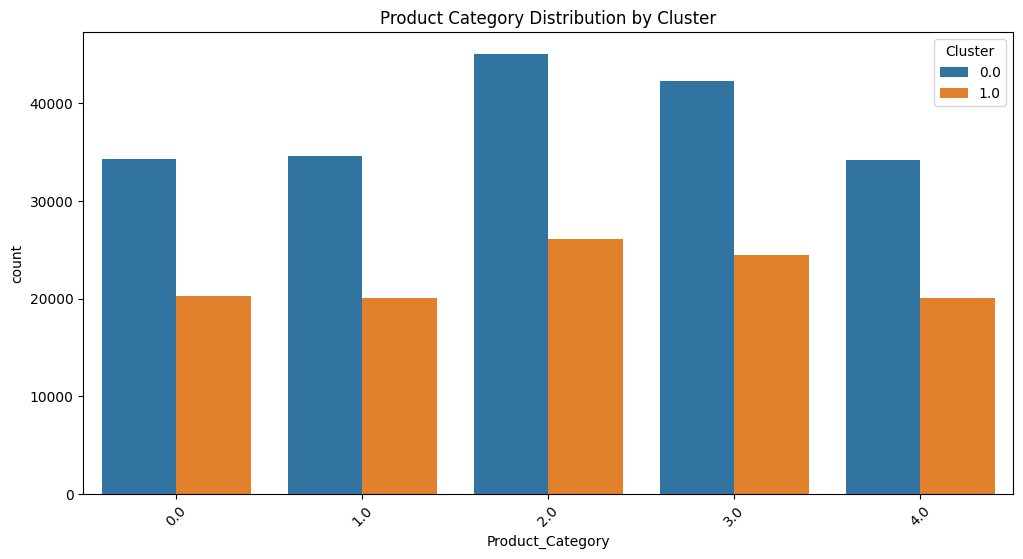

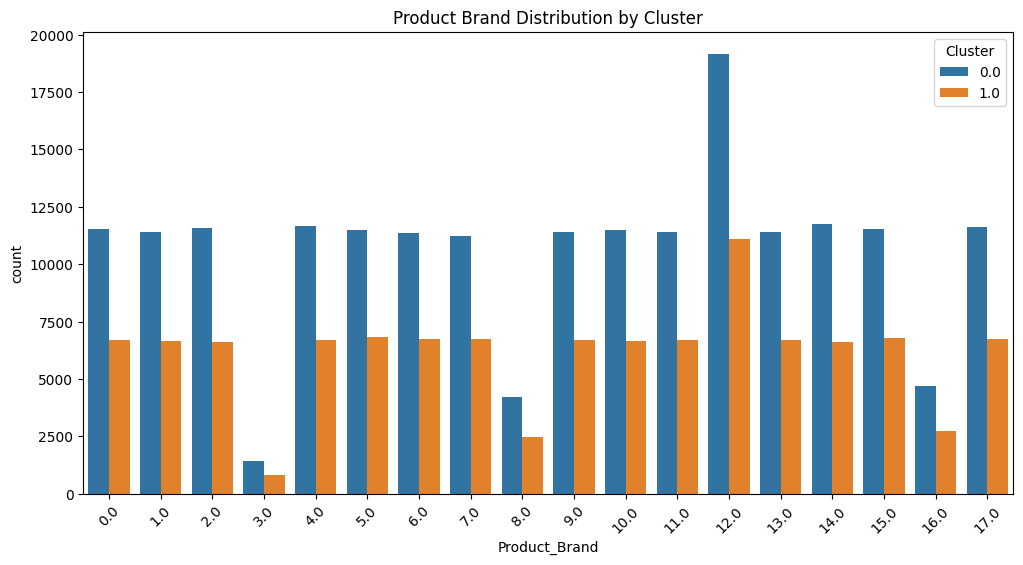

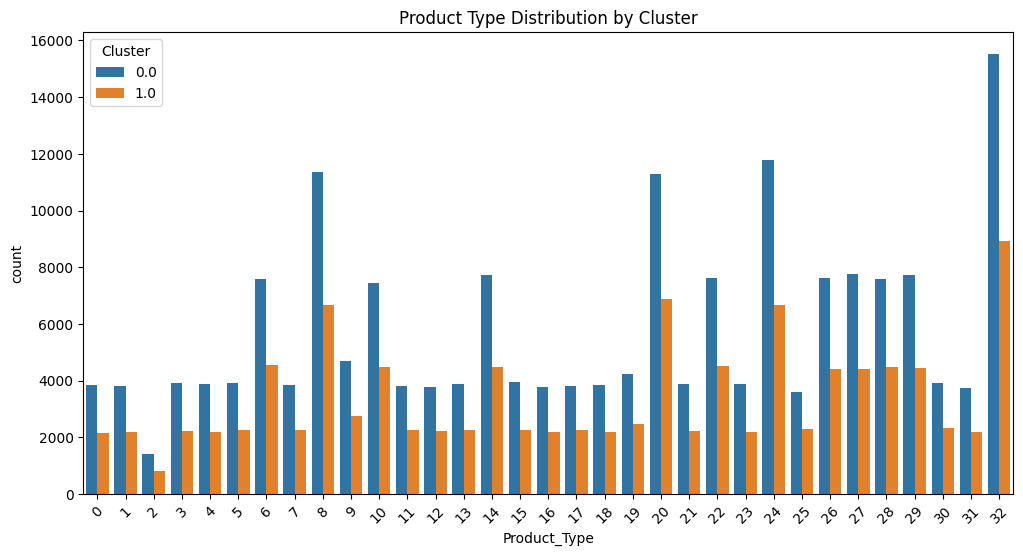

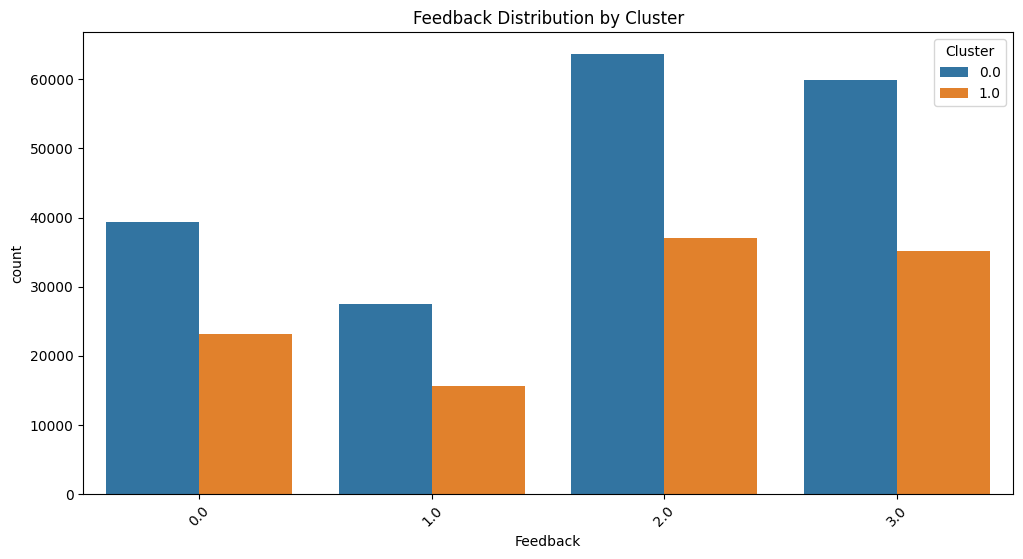

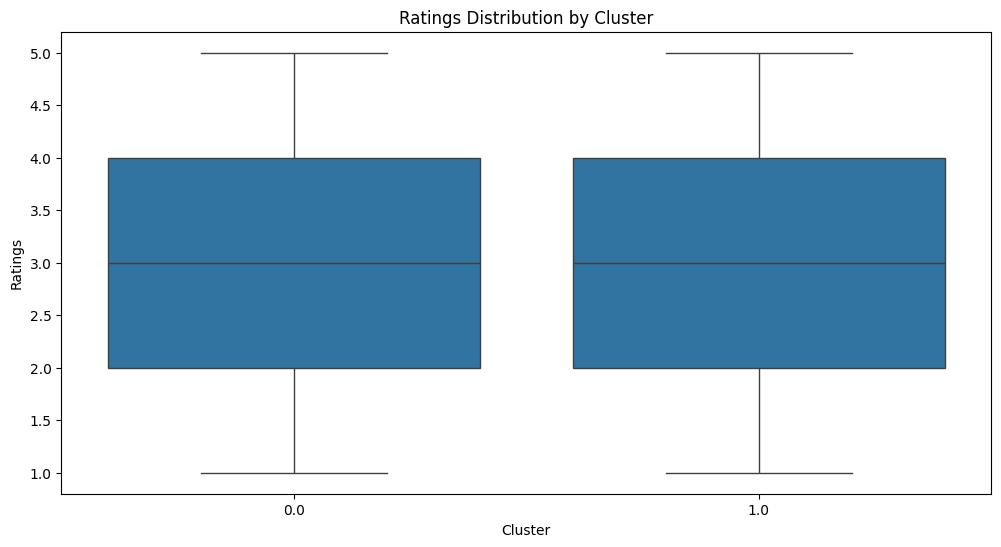

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 合併後的數據已經進行了RFM計算和KMeans聚類
# 現在進行產品類別、品牌、類型的偏好分析，以及回饋和評論的分析
data_cleaned = data_cleaned.merge(data_rfm_cleaned[['Cluster']], left_on='Customer_ID', right_index=True, how='left')

# 產品類別分佈
plt.figure(figsize=(12, 6))
sns.countplot(data=data_cleaned, x='Product_Category', hue='Cluster')
plt.title('Product Category Distribution by Cluster')
plt.xticks(rotation=45)
plt.show()

# 產品品牌分佈
plt.figure(figsize=(12, 6))
sns.countplot(data=data_cleaned, x='Product_Brand', hue='Cluster')
plt.title('Product Brand Distribution by Cluster')
plt.xticks(rotation=45)
plt.show()

# 產品類型分佈
plt.figure(figsize=(12, 6))
sns.countplot(data=data_cleaned, x='Product_Type', hue='Cluster')
plt.title('Product Type Distribution by Cluster')
plt.xticks(rotation=45)
plt.show()

# 回饋分佈
plt.figure(figsize=(12, 6))
sns.countplot(data=data_cleaned, x='Feedback', hue='Cluster')
plt.title('Feedback Distribution by Cluster')
plt.xticks(rotation=45)
plt.show()

# 評論分佈（平均評論分數）
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_cleaned, x='Cluster', y='Ratings')
plt.title('Ratings Distribution by Cluster')
plt.show()